In [6]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk
import numpy as np
from collections import Counter
from matplotlib_venn import venn3, venn2




In [13]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
files_path = '/content/drive/MyDrive/QBC AI/Project_2/'
train_df = pd.read_csv(files_path + "train_data.csv")
test_df = pd.read_csv(files_path + "test_data.csv")
title_brand_df = pd.read_csv(files_path + "title_brand.csv")

<ipython-input-14-643915f0df6e>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(files_path + "train_data.csv")


<div dir="rtl">

### ŸÖÿ¥ÿÆÿµÿßÿ™ ÿØÿßÿØŸá‚ÄåŸáÿß:

- **overall**: ÿßŸÖÿ™€åÿßÿ≤ ŸÖÿ≠ÿµŸàŸÑ (ÿ™Ÿàÿ≥ÿ∑ ŸÅÿ±ÿØ ŸÜÿ∏ÿ± ÿØŸáŸÜÿØŸá) ÿßÿ≤ €± ÿ™ÿß €µ  
- **vote**: ÿ™ÿπÿØÿßÿØ ÿ±ÿß€å‚ÄåŸáÿß€å ÿØ€åÿØ⁄ØÿßŸá ÿßÿ≤ ŸÜÿ∏ÿ± ŸÖŸÅ€åÿØ ÿ®ŸàÿØŸÜ (helpful)  
- **verified**: ÿ¢€åÿß ÿ™ÿ£€å€åÿØ Ÿà ŸÖŸÜÿ™ÿ¥ÿ± ÿ¥ÿØŸá ÿßÿ≥ÿ™ €åÿß ÿÆ€åÿ±  
- **reviewTime**: ÿ™ÿßÿ±€åÿÆ ÿ´ÿ®ÿ™ ŸÜÿ∏ÿ±  
- **reviewerID**: ÿ¥ŸÜÿßÿ≥Ÿá‚Äå€å ÿ¥ÿÆÿµ ŸÜÿ∏ÿ± ÿØŸáŸÜÿØŸá  
- **Asin**: ÿ¥ŸÜÿßÿ≥Ÿá‚Äå€å ŸÖÿ≠ÿµŸàŸÑ (ÿ®ÿ±ÿß€å ÿØÿ≥ÿ™ÿ±ÿ≥€å ÿ®Ÿá ŸÑ€åŸÜ⁄© ŸÖÿ≠ÿµŸàŸÑ ŸÖ€å‚Äåÿ™ŸàÿßŸÜ€åÿØ ÿ¥ŸÜÿßÿ≥Ÿá ÿ±ÿß ÿ®ÿπÿØ ÿßÿ≤ `https://www.amazon.com/dp/` ŸÇÿ±ÿßÿ± ÿØŸá€åÿØ)  
- **style**: ÿØ€å⁄©ÿ¥ŸÜÿ±€å ÿ¥ÿßŸÖŸÑ ÿ®ÿ±ÿÆ€å ÿ™Ÿàÿ∂€åÿ≠ÿßÿ™ ŸÖÿ≠ÿµŸàŸÑ ŸÖÿ´ŸÑ ÿ±ŸÜ⁄Øÿå ÿ≥ÿß€åÿ≤ Ÿà ÿ∫€åÿ±Ÿá  
- **reviewerName**: ŸÜÿßŸÖ ÿ¥ÿÆÿµ ŸÜÿ∏ÿ± ÿØŸáŸÜÿØŸá  
- **reviewText**: ŸÖÿ™ŸÜ ŸÜÿ∏ÿ±  
- **summary**: ÿÆŸÑÿßÿµŸá‚Äå€å ŸÜÿ∏ÿ±  
- **unixReviewTime**: ÿ≤ŸÖÿßŸÜ ÿ´ÿ®ÿ™ ŸÜÿ∏ÿ± ÿ®ÿß ŸÅÿ±ŸÖÿ™ Unix Time  

</div>


# 1. ÿ™Ÿàÿ≤€åÿπ ÿ≥ÿ™ŸàŸÜ overall

Overall Score Distribution
overall
5    0.550078
4    0.186561
1    0.098874
3    0.096835
2    0.067652
Name: proportion, dtype: float64


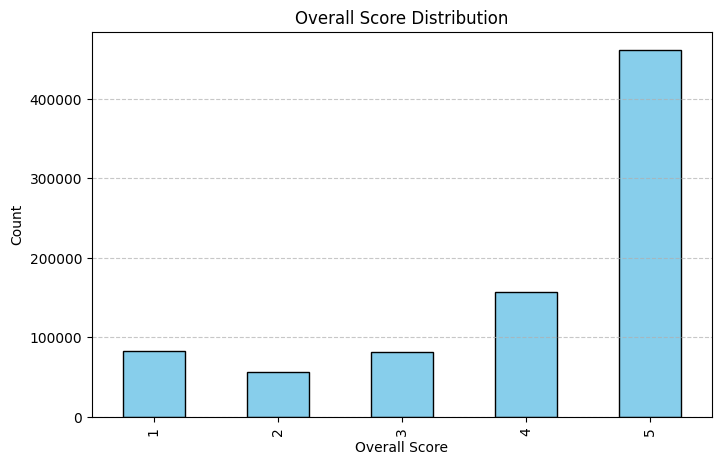

In [15]:
# ÿ®ÿ±ÿ±ÿ≥€å ÿ™Ÿàÿßÿ≤ŸÜ ÿØÿßÿØŸá‚ÄåŸáÿß
distribution = train_df['overall'].value_counts(normalize=True)
print("Overall Score Distribution")
print(distribution)

plt.figure(figsize=(8,5))
train_df['overall'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Overall Score")
plt.ylabel("Count")
plt.title("Overall Score Distribution")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<div style="direction: rtl; text-align: right; font-family: Arial, sans-serif; font-size: 14px;">
    <b>Undersampling (⁄©ÿßŸáÿ¥ ŸÜŸÖŸàŸÜŸá‚ÄåŸáÿß€å Ÿæÿ±ÿ™⁄©ÿ±ÿßÿ±)</b>
    <br>
    ⁄©ÿßŸáÿ¥ ÿ™ÿπÿØÿßÿØ ŸÜŸÖŸàŸÜŸá‚ÄåŸáÿß€å ⁄©ŸÑÿßÿ≥‚ÄåŸáÿß€å Ÿæÿ±ÿ™⁄©ÿ±ÿßÿ± (ŸÖÿ´ŸÑÿßŸã ⁄©ÿßŸáÿ¥ ÿßŸÖÿ™€åÿßÿ≤ÿßÿ™ €µ) ÿ®Ÿá ÿ≥ÿ∑ÿ≠ ⁄©ŸÑÿßÿ≥‚ÄåŸáÿß€å ⁄©ŸÖÿ™ÿ± ÿ™⁄©ÿ±ÿßÿ± ÿ¥ÿØŸá.
    <br><br>
    <b>Oversampling (ÿßŸÅÿ≤ÿß€åÿ¥ ŸÜŸÖŸàŸÜŸá‚ÄåŸáÿß€å ŸÜÿßÿØÿ±)</b>
    <br>
    ÿßŸÅÿ≤ÿß€åÿ¥ ÿØÿßÿØŸá‚ÄåŸáÿß€å ⁄©ŸÑÿßÿ≥‚ÄåŸáÿß€å ÿØÿßÿ±ÿß€å ŸÜŸÖŸàŸÜŸá ⁄©ŸÖ ÿ®ÿß ÿ™⁄©ÿ±ÿßÿ± ÿØÿßÿØŸá‚ÄåŸáÿß €åÿß ÿ™ŸàŸÑ€åÿØ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ¨ÿØ€åÿØ.
    <br><br>
    ŸÖ€å‚Äåÿ™ŸàÿßŸÜ ŸÖÿØŸÑ ÿ±ÿß ÿ∑Ÿàÿ±€å ÿ™ŸÜÿ∏€åŸÖ ⁄©ÿ±ÿØ ⁄©Ÿá ŸáŸÜ⁄ØÿßŸÖ ÿ¢ŸÖŸàÿ≤ÿ¥ÿå ÿ®Ÿá ⁄©ŸÑÿßÿ≥‚ÄåŸáÿß€å ⁄©ŸÖÿ™ÿ± ÿ™⁄©ÿ±ÿßÿ± ÿ¥ÿØŸá Ÿàÿ≤ŸÜ ÿ®€åÿ¥ÿ™ÿ±€å ÿ®ÿØŸáÿØ ÿ™ÿß ÿ™ÿ£ÿ´€åÿ± ÿ¢ŸÜ‚ÄåŸáÿß ÿ®€åÿ¥ÿ™ÿ± ÿ¥ŸàÿØ.
</div>

#2. ÿßÿ®ÿ± ⁄©ŸÑŸÖÿßÿ™ (Word Cloud)

In [16]:
# ÿ™ÿπÿ±€åŸÅ ÿØÿ≥ÿ™Ÿá‚ÄåŸáÿß€å ÿßÿ≠ÿ≥ÿßÿ≥ÿßÿ™
def categorize_sentiment(score):
    if score >= 4:
        return "positive"
    elif score == 3:
        return "neutral"
    else:
        return "negative"

# Ÿæ€åÿ¥‚ÄåŸæÿ±ÿØÿßÿ≤ÿ¥ ŸÖÿ™ŸÜ
def preprocess_text(text):
    text = str(text).lower()  # ÿ™ÿ®ÿØ€åŸÑ ÿ®Ÿá ÿ≠ÿ±ŸàŸÅ ⁄©Ÿà⁄Ü⁄©
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # ÿ≠ÿ∞ŸÅ ÿßÿπÿØÿßÿØ Ÿà ŸÜÿ¥ÿßŸÜŸá‚Äå⁄Øÿ∞ÿßÿ±€å‚ÄåŸáÿß
    words = text.split()
    words = [word for word in words if word not in stop_words]  # ÿ≠ÿ∞ŸÅ stopwords
    return ' '.join(words)

# ÿ±ÿ≥ŸÖ ÿßÿ®ÿ± ⁄©ŸÑŸÖÿßÿ™
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

In [18]:
# stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # ŸÑ€åÿ≥ÿ™ ⁄©ŸÑŸÖÿßÿ™ ÿ≤ÿßÿ¶ÿØ


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


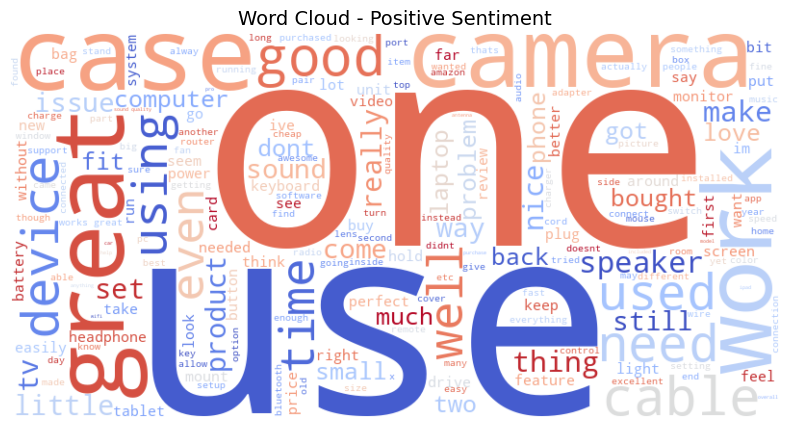

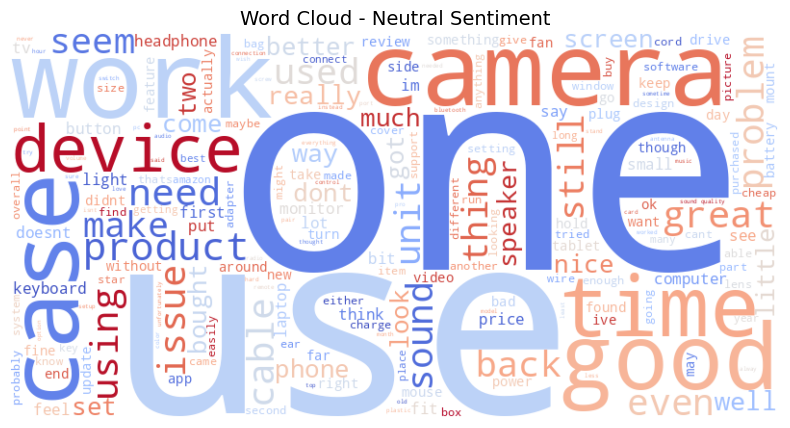

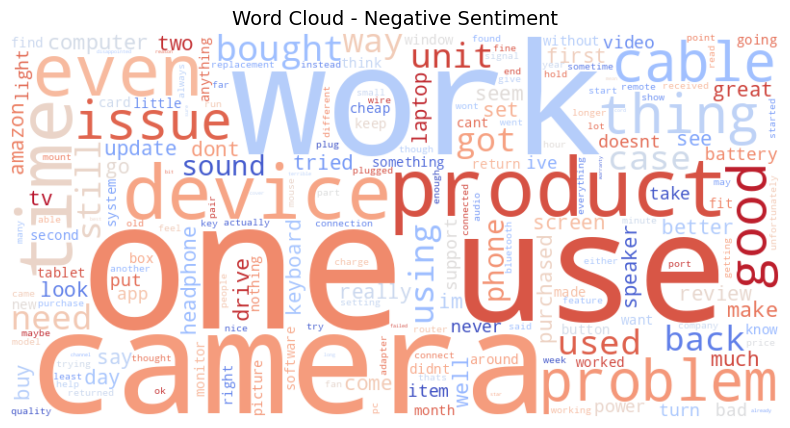

In [19]:

train_df["sentiment"] = train_df["overall"].apply(categorize_sentiment)
train_df["cleaned_review"] = train_df["reviewText"].apply(preprocess_text)

# ÿ™ŸàŸÑ€åÿØ Ÿà ŸÜŸÖÿß€åÿ¥ ÿßÿ®ÿ± ⁄©ŸÑŸÖÿßÿ™ ÿ®ÿ±ÿß€å Ÿáÿ± ÿØÿ≥ÿ™Ÿá
for sentiment in ["positive", "neutral", "negative"]:
    sample_texts = train_df[train_df["sentiment"] == sentiment]["cleaned_review"].sample(n=min(10000, len(train_df[train_df["sentiment"] == sentiment])), random_state=42)  # ÿßŸÜÿ™ÿÆÿßÿ® 10,000 ŸÜÿ∏ÿ± ÿ™ÿµÿßÿØŸÅ€å
    text_data = ' '.join(sample_texts)
    plot_wordcloud(text_data, f"Word Cloud - {sentiment.capitalize()} Sentiment")


### ⁄©ŸÑŸÖÿßÿ™ ŸÖÿ¥ÿ™ÿ±⁄© ÿ®€åŸÜ ŸáŸÖŸá‚Äå€å ÿØÿ≥ÿ™Ÿá‚ÄåŸáÿß

#### **"use" (ÿßÿ≥ÿ™ŸÅÿßÿØŸá)**
‚úÖ **ÿØÿ± ŸÖÿ´ÿ®ÿ™:** `"easy to use", "great to use"`  
‚ùå **ÿØÿ± ŸÖŸÜŸÅ€å:** `"hard to use", "doesn‚Äôt work", "problem using"`  
‚öñ **ÿØÿ± ÿÆŸÜÿ´€å:** *ÿ™Ÿàÿµ€åŸÅ€å ÿ®€å‚Äåÿ∑ÿ±ŸÅÿßŸÜŸá ŸÖÿßŸÜŸÜÿØ* `"can use", "using it for work"`  
üìù **ÿ™ŸÅÿ≥€åÿ±:** ÿß€åŸÜ ŸÜÿ¥ÿßŸÜ ŸÖ€å‚ÄåÿØŸáÿØ ⁄©Ÿá ⁄©ÿßÿ±ÿ®ÿ±ÿßŸÜ ÿØÿ± Ÿáÿ± ÿ≥Ÿá ÿØÿ≥ÿ™Ÿá ÿØÿ±ÿ®ÿßÿ±Ÿá‚Äå€å ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ ŸÖÿ≠ÿµŸàŸÑ ŸÜÿ∏ÿ± ŸÖ€å‚ÄåÿØŸáŸÜÿØÿå ÿßŸÖÿß **ŸÑÿ≠ŸÜ ÿ¨ŸÖŸÑŸá** ÿ™ÿπ€å€åŸÜ‚Äå⁄©ŸÜŸÜÿØŸá‚Äå€å ÿßÿ≠ÿ≥ÿßÿ≥ÿßÿ™ ÿ¢ŸÜ ÿßÿ≥ÿ™.

---

#### **"one" (€å⁄©€åÿå €å⁄© ŸÖŸàÿ±ÿØ)**
‚úÖ **ÿØÿ± ŸÖÿ´ÿ®ÿ™:** `"one of the best", "love this one"`  
‚ùå **ÿØÿ± ŸÖŸÜŸÅ€å:** `"one problem I faced", "only one worked"`  
‚öñ **ÿØÿ± ÿÆŸÜÿ´€å:** `"one more feature", "one option available"`  
üìù **ÿ™ŸÅÿ≥€åÿ±:** ÿß€åŸÜ ⁄©ŸÑŸÖŸá ÿ®Ÿá ÿ∑Ÿàÿ± ⁄©ŸÑ€å ÿØÿ± ŸÖŸàÿ±ÿØ **ÿßÿ¥ÿßÿ±Ÿá ÿ®Ÿá ÿ™ÿπÿØÿßÿØ €åÿß ÿ™ÿ¨ÿ±ÿ®Ÿá €å⁄© ŸÜŸÖŸàŸÜŸá ÿßÿ≤ ŸÖÿ≠ÿµŸàŸÑ** ÿßÿ≥ÿ™ŸÅÿßÿØŸá ŸÖ€å‚Äåÿ¥ŸàÿØÿå ÿßŸÖÿß **ŸáŸÖÿ±ÿßŸá€å ÿ¢ŸÜ ÿ®ÿß ⁄©ŸÑŸÖÿßÿ™ ÿØ€å⁄Øÿ±** ÿ≠ÿ≥ ÿ¨ŸÖŸÑŸá ÿ±ÿß ŸÖÿ¥ÿÆÿµ ŸÖ€å‚Äå⁄©ŸÜÿØ.

---

#### **"device" (ÿØÿ≥ÿ™⁄ØÿßŸá)**
‚úÖ **ÿØÿ± ŸÖÿ´ÿ®ÿ™:** `"this device works great", "perfect device"`  
‚ùå **ÿØÿ± ŸÖŸÜŸÅ€å:** `"device stopped working", "bad device"`  
‚öñ **ÿØÿ± ÿÆŸÜÿ´€å:** `"this device is useful for work"`  
üìù **ÿ™ŸÅÿ≥€åÿ±:** ÿØÿ± ŸÜÿ∏ÿ±ÿßÿ™ ŸÖÿ´ÿ®ÿ™ÿå ÿß€åŸÜ ⁄©ŸÑŸÖŸá ÿ®ÿß **ÿπÿ®ÿßÿ±ÿßÿ™ ÿ™ÿ≠ÿ≥€åŸÜ‚Äåÿ¢ŸÖ€åÿ≤** ŸáŸÖÿ±ÿßŸá ÿßÿ≥ÿ™ÿå ÿßŸÖÿß ÿØÿ± ŸÜÿ∏ÿ±ÿßÿ™ ŸÖŸÜŸÅ€å ÿ®ÿß **ŸÖÿ¥⁄©ŸÑÿßÿ™ ÿπŸÖŸÑ⁄©ÿ±ÿØ€å** ŸáŸÖÿ±ÿßŸá ŸÖ€å‚Äåÿ¥ŸàÿØ.

---

## ** ÿ™ŸÅÿßŸàÿ™‚ÄåŸáÿß€å ⁄©ŸÑ€åÿØ€å ÿØÿ± ÿØÿ≥ÿ™Ÿá‚ÄåŸáÿß€å ŸÖÿ´ÿ®ÿ™ Ÿà ŸÖŸÜŸÅ€å**

### **‚úÖ ⁄©ŸÑŸÖÿßÿ™ ŸÖÿ´ÿ®ÿ™ ŸÖŸÜÿ≠ÿµÿ±‚Äåÿ®Ÿá‚ÄåŸÅÿ±ÿØ**
`"great", "love", "nice", "perfect", "excellent", "amazing"`
üìù **ÿ™ŸÅÿ≥€åÿ±:** ⁄©ÿßÿ±ÿ®ÿ±ÿßŸÜ ŸáŸÜ⁄ØÿßŸÖ **ÿ±ÿ∂ÿß€åÿ™ÿå ÿßÿ≤ ÿµŸÅÿßÿ™ ŸÇŸà€å Ÿà ÿ™ÿ£⁄©€åÿØ€å** ÿßÿ≥ÿ™ŸÅÿßÿØŸá ŸÖ€å‚Äå⁄©ŸÜŸÜÿØ.

### **‚ùå ⁄©ŸÑŸÖÿßÿ™ ŸÖŸÜŸÅ€å ŸÖŸÜÿ≠ÿµÿ±‚Äåÿ®Ÿá‚ÄåŸÅÿ±ÿØ**
`"problem", "issue", "bad", "poor", "return", "broken", "doesn‚Äôt work"`
üìù **ÿ™ŸÅÿ≥€åÿ±:** ŸÜÿ∏ÿ±ÿßÿ™ ŸÖŸÜŸÅ€å ŸÖÿπŸÖŸàŸÑÿßŸã ÿ¥ÿßŸÖŸÑ ⁄©ŸÑŸÖÿßÿ™€å **ŸÖÿ±ÿ™ÿ®ÿ∑ ÿ®ÿß ŸÖÿ¥⁄©ŸÑÿßÿ™ ŸÅŸÜ€åÿå ÿÆÿ±ÿßÿ®€åÿå ⁄©€åŸÅ€åÿ™ Ÿæÿß€å€åŸÜ Ÿà ÿ™ÿ¨ÿ±ÿ®Ÿá‚Äå€å ÿ®ÿØ ÿÆÿ±€åÿØ** Ÿáÿ≥ÿ™ŸÜÿØ.


In [23]:
def get_top_words(texts, n=100):
    all_words = ' '.join(texts).lower().split()
    filtered_words = [word for word in all_words if word not in stop_words]
    word_counts = Counter(filtered_words)
    return set([word for word, _ in word_counts.most_common(n)])


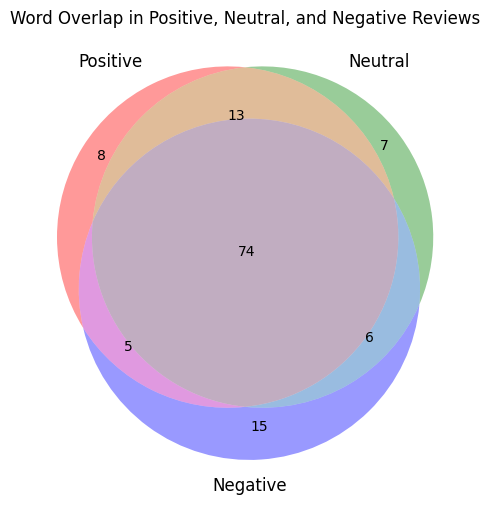

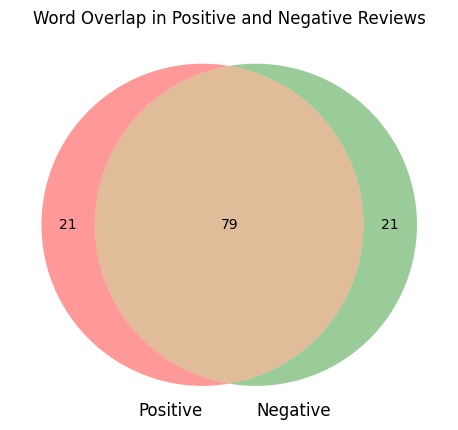

In [24]:
# ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ 100 ⁄©ŸÑŸÖŸá Ÿæÿ±ÿ™⁄©ÿ±ÿßÿ± ÿ®ÿ±ÿß€å Ÿáÿ± ÿØÿ≥ÿ™Ÿá
positive_words = get_top_words(train_df[train_df["sentiment"] == "positive"]["reviewText"], 100)
neutral_words = get_top_words(train_df[train_df["sentiment"] == "neutral"]["reviewText"], 100)
negative_words = get_top_words(train_df[train_df["sentiment"] == "negative"]["reviewText"], 100)

#  ŸÜŸÖŸàÿØÿßÿ± ŸàŸÜ ÿ®ÿ±ÿß€å ÿ≥Ÿá ⁄Øÿ±ŸàŸá (ŸÖÿ´ÿ®ÿ™ÿå ÿÆŸÜÿ´€åÿå ŸÖŸÜŸÅ€å)
plt.figure(figsize=(8,6))
venn3([positive_words, neutral_words, negative_words],
      set_labels=('Positive', 'Neutral', 'Negative'))
plt.title("Word Overlap in Positive, Neutral, and Negative Reviews")
plt.show()

#  ŸÜŸÖŸàÿØÿßÿ± ŸàŸÜ ÿ®ÿ±ÿß€å ÿØŸà ⁄Øÿ±ŸàŸá (ŸÖÿ´ÿ®ÿ™ Ÿà ŸÖŸÜŸÅ€å)
plt.figure(figsize=(6,5))
venn2([positive_words, negative_words],
      set_labels=('Positive', 'Negative'))
plt.title("Word Overlap in Positive and Negative Reviews")
plt.show()

In [29]:
common_words_all = positive_words & neutral_words & negative_words

# ÿßÿ¥ÿ™ÿ±ÿß⁄© ÿ®€åŸÜ ⁄Øÿ±ŸàŸá‚ÄåŸáÿß€å ŸÖÿ´ÿ®ÿ™ Ÿà ŸÖŸÜŸÅ€å
common_words_pos_neg = positive_words & negative_words

# ÿßÿÆÿ™ÿµÿßÿµ€å Ÿáÿ± ⁄Øÿ±ŸàŸá
unique_positive = positive_words - (neutral_words | negative_words)
unique_neutral = neutral_words - (positive_words | negative_words)
unique_negative = negative_words - (positive_words | neutral_words)

# ŸÜŸÖÿß€åÿ¥ ŸÜÿ™ÿß€åÿ¨
print("üîπ 10 ŸÖÿ¥ÿ™ÿ±⁄© ÿ®€åŸÜ ÿ≥Ÿá ÿØÿ≥ÿ™Ÿá:", list(common_words_all)[:10])
print("üîπ 10 ŸÖÿ¥ÿ™ÿ±⁄© ÿ®€åŸÜ ŸÖÿ´ÿ®ÿ™ Ÿà ŸÖŸÜŸÅ€å:", list(common_words_pos_neg)[:10])
print("\n 10 ⁄©ŸÑŸÖŸá ÿßÿÆÿ™ÿµÿßÿµ€å ŸÜÿ∏ÿ±ÿßÿ™ ŸÖÿ´ÿ®ÿ™:", list(unique_positive)[:10])
print(" 10 ⁄©ŸÑŸÖŸá ÿßÿÆÿ™ÿµÿßÿµ€å ŸÜÿ∏ÿ±ÿßÿ™ ÿÆŸÜÿ´€å:", list(unique_neutral)[:10])
print(" 10 ⁄©ŸÑŸÖŸá ÿßÿÆÿ™ÿµÿßÿµ€å ŸÜÿ∏ÿ±ÿßÿ™ ŸÖŸÜŸÅ€å:", list(unique_negative)[:10])

üîπ 10 ŸÖÿ¥ÿ™ÿ±⁄© ÿ®€åŸÜ ÿ≥Ÿá ÿØÿ≥ÿ™Ÿá: ['cable', 'phone', 'product', 'get', 'set', '3', 'first', 'worked', 'tv', 'could']
üîπ 10 ŸÖÿ¥ÿ™ÿ±⁄© ÿ®€åŸÜ ŸÖÿ´ÿ®ÿ™ Ÿà ŸÖŸÜŸÅ€å: ['get', 'set', 'seems', 'good', 'got', 'computer', 'using', 'want', 'even', 'device']

 10 ⁄©ŸÑŸÖŸá ÿßÿÆÿ™ÿµÿßÿµ€å ŸÜÿ∏ÿ±ÿßÿ™ ŸÖÿ´ÿ®ÿ™: ['love', 'laptop', 'far', 'best', 'great.', 'take', 'looking', 'well.']
 10 ⁄©ŸÑŸÖŸá ÿßÿÆÿ™ÿµÿßÿµ€å ŸÜÿ∏ÿ±ÿßÿ™ ÿÆŸÜÿ´€å: ['issue', 'may', 'give', 'however,', 'probably', 'stars', 'look']
 10 ⁄©ŸÑŸÖŸá ÿßÿÆÿ™ÿµÿßÿµ€å ŸÜÿ∏ÿ±ÿßÿ™ ŸÖŸÜŸÅ€å: ['work.', 'every', '5', 'support', 'card', 'amazon', 'return', 'turn', 'working', 'last']


# 3. ÿØŸá ŸÜŸÅÿ±€å ⁄©Ÿá ÿØÿ± ŸÖÿ¨ŸÖŸàÿπ ŸÜÿ∏ÿ±ÿßÿ™‚Äåÿ¥ÿßŸÜ ÿ®€åÿ¥ÿ™ÿ± ŸÖŸÅ€åÿØ ŸàÿßŸÇÿπ ÿ¥ÿØŸá

In [28]:
# ÿ™ÿ®ÿØ€åŸÑ ŸÖŸÇÿßÿØ€åÿ± ÿ≥ÿ™ŸàŸÜ vote ÿ®Ÿá ÿπÿØÿØ€å (ÿØÿ± ÿµŸàÿ±ÿ™€å ⁄©Ÿá ŸÖŸÇÿØÿßÿ± ŸÜÿßŸÖÿπÿ™ÿ®ÿ± ÿ®ÿßÿ¥ÿØ ÿ¢ŸÜ ÿ±ÿß ÿµŸÅÿ± ÿØÿ± ŸÜÿ∏ÿ± ŸÖ€å‚Äå⁄Ø€åÿ±€åŸÖ)
train_df["vote"] = pd.to_numeric(train_df["vote"], errors="coerce").fillna(0)

# ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ŸÖÿ¨ŸÖŸàÿπ vote ÿ®ÿ±ÿß€å Ÿáÿ± ⁄©ÿßÿ±ÿ®ÿ±
top_reviewers = train_df.groupby("reviewerName")["vote"].sum().reset_index()

# ŸÖÿ±ÿ™ÿ®‚Äåÿ≥ÿßÿ≤€å ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ŸÖÿ¨ŸÖŸàÿπ vote ÿ®Ÿá ÿ™ÿ±ÿ™€åÿ® ŸÜÿ≤ŸàŸÑ€å Ÿà ÿßŸÜÿ™ÿÆÿßÿ® 10 ŸÜŸÅÿ± ÿ®ÿ±ÿ™ÿ±
top_reviewers = top_reviewers.sort_values(by="vote", ascending=False).head(10)

In [ ]:
top_reviewers

reviewerName     vote
8814    Amazon Customer  28871.0
18911      Benson Leung   4572.0
125747          Michael   3710.0
128120             Mike   3000.0
106007  Kindle Customer   2927.0
93478              John   2730.0
46080              Dave   2230.0
46527             David   2194.0
33876             Chris   2060.0
174700            Steve   2046.0

# €¥. Ÿá€åÿ≥ÿ™Ÿà⁄Øÿ±ÿßŸÖ ÿ∑ŸàŸÑ ŸÖÿ™ŸÜ

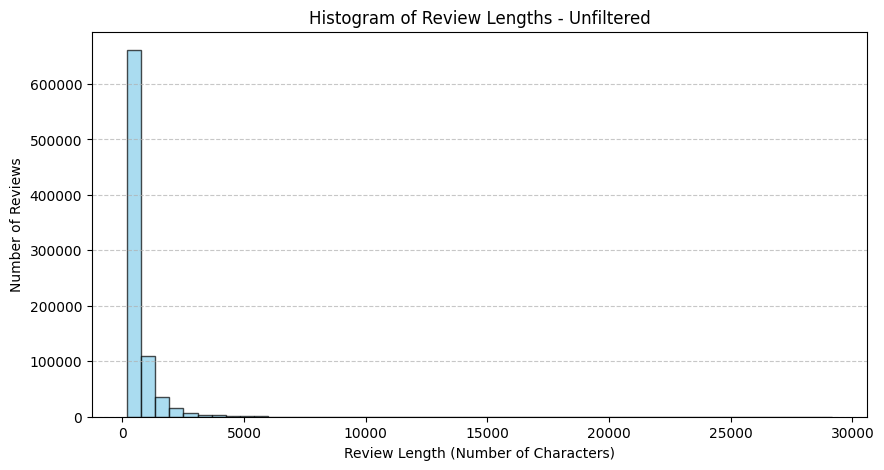

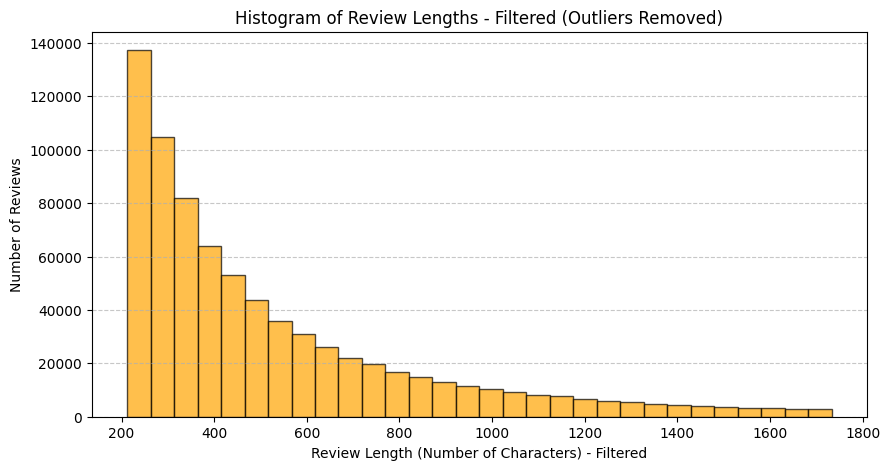

In [ ]:
# ÿ≠ÿ∞ŸÅ ŸÖŸÇÿßÿØ€åÿ± NaN ÿØÿ± ÿ≥ÿ™ŸàŸÜ reviewText
reviewText_df = train_df.dropna(subset=["reviewText"])

# ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿ∑ŸàŸÑ Ÿáÿ± ŸÜÿ∏ÿ± (ÿ™ÿπÿØÿßÿØ ⁄©ÿßÿ±ÿß⁄©ÿ™ÿ±Ÿáÿß)
reviewText_df["review_length"] = reviewText_df["reviewText"].apply(len)

# ÿ±ÿ≥ŸÖ Ÿá€åÿ≥ÿ™Ÿà⁄Øÿ±ÿßŸÖ ÿßÿµŸÑ€å
plt.figure(figsize=(10, 5))
plt.hist(reviewText_df["review_length"], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel("Review Length (Number of Characters)")
plt.ylabel("Number of Reviews")
plt.title("Histogram of Review Lengths - Unfiltered")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ŸÅ€åŸÑÿ™ÿ± ⁄©ÿ±ÿØŸÜ ÿØÿßÿØŸá‚ÄåŸáÿß (ÿ≠ÿ∞ŸÅ ŸÖŸÇÿßÿØ€åÿ± Ÿæÿ±ÿ™)
lower_bound, upper_bound = np.percentile(reviewText_df["review_length"], [5, 95])  # ÿ≠ÿ∞ŸÅ 5% ⁄©Ÿà⁄Ü⁄©ÿ™ÿ±€åŸÜ Ÿà ÿ®ÿ≤ÿ±⁄Øÿ™ÿ±€åŸÜ ŸÜÿ∏ÿ±ÿßÿ™
filtered_df = reviewText_df[(reviewText_df["review_length"] >= lower_bound) & (reviewText_df["review_length"] <= upper_bound)]

# ÿ±ÿ≥ŸÖ Ÿá€åÿ≥ÿ™Ÿà⁄Øÿ±ÿßŸÖ ŸÅ€åŸÑÿ™ÿ±ÿ¥ÿØŸá
plt.figure(figsize=(10, 5))
plt.hist(filtered_df["review_length"], bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel("Review Length (Number of Characters) - Filtered")
plt.ylabel("Number of Reviews")
plt.title("Histogram of Review Lengths - Filtered (Outliers Removed)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# ÿ¢€åÿß ŸÜ€åÿßÿ≤ ÿ®Ÿá ŸÖÿ≠ÿØŸàÿØ€åÿ™ ÿØÿ± ÿ™ÿπÿØÿßÿØ ⁄©ÿßÿ±ÿß⁄©ÿ™ÿ±Ÿáÿß ÿØÿßÿ±€åŸÖÿü
ÿ®ŸÑŸáÿå ÿßÿπŸÖÿßŸÑ ŸÖÿ≠ÿØŸàÿØ€åÿ™ ÿ±Ÿà€å ÿ™ÿπÿØÿßÿØ ⁄©ÿßÿ±ÿß⁄©ÿ™ÿ±Ÿáÿß ŸÖ€å‚Äåÿ™ŸàÿßŸÜÿØ ÿ®Ÿá ÿ®Ÿáÿ®ŸàÿØ ŸÖÿØŸÑ‚Äåÿ≥ÿßÿ≤€å ⁄©ŸÖ⁄© ⁄©ŸÜÿØÿå ÿ≤€åÿ±ÿß:

- **ŸÜÿ∏ÿ±ÿßÿ™ ÿ®ÿ≥€åÿßÿ± ⁄©Ÿàÿ™ÿßŸá** (ŸÖÿ´ŸÑÿßŸã ⁄©ŸÖÿ™ÿ± ÿßÿ≤ **50 ⁄©ÿßÿ±ÿß⁄©ÿ™ÿ±**) ŸÖÿπŸÖŸàŸÑÿßŸã ÿßÿ∑ŸÑÿßÿπÿßÿ™ ⁄©ÿßŸÅ€å ÿ®ÿ±ÿß€å ÿ™ÿ≠ŸÑ€åŸÑ ÿßÿ≠ÿ≥ÿßÿ≥ÿßÿ™ ŸÜÿØÿßÿ±ŸÜÿØ.
- **ŸÜÿ∏ÿ±ÿßÿ™ ÿ®ÿ≥€åÿßÿ± ÿ®ŸÑŸÜÿØ** (ŸÖÿ´ŸÑÿßŸã ÿ®€åÿ¥ÿ™ÿ± ÿßÿ≤ **2000 ⁄©ÿßÿ±ÿß⁄©ÿ™ÿ±**) ŸÖŸÖ⁄©ŸÜ ÿßÿ≥ÿ™ **ŸÜŸà€åÿ≤ ÿØÿßÿ¥ÿ™Ÿá ÿ®ÿßÿ¥ŸÜÿØ**ÿå ÿ®ÿßÿπÿ´ ÿßŸÅÿ≤ÿß€åÿ¥ Ÿæ€å⁄Ü€åÿØ⁄Ø€å ŸÖÿØŸÑ ÿ¥ŸàŸÜÿØ Ÿà ÿ®Ÿá ÿ≠ÿßŸÅÿ∏Ÿá Ÿà ÿ≤ŸÖÿßŸÜ Ÿæÿ±ÿØÿßÿ≤ÿ¥ ÿ®€åÿ¥ÿ™ÿ±€å ŸÜ€åÿßÿ≤ ÿØÿßÿ¥ÿ™Ÿá ÿ®ÿßÿ¥ŸÜÿØ.
- **ÿ™Ÿàÿ≤€åÿπ ÿØÿßÿØŸá‚ÄåŸáÿß ÿØÿ± ŸÜŸÖŸàÿØÿßÿ± ŸÅ€åŸÑÿ™ÿ± ÿ¥ÿØŸá ŸÜÿ¥ÿßŸÜ ŸÖ€å‚ÄåÿØŸáÿØ ⁄©Ÿá ÿß⁄©ÿ´ÿ±€åÿ™ ŸÜÿ∏ÿ±ÿßÿ™ ÿØÿ± ŸÖÿ≠ÿØŸàÿØŸá 200 ÿ™ÿß 1000 ⁄©ÿßÿ±ÿß⁄©ÿ™ÿ± ŸÇÿ±ÿßÿ± ÿØÿßÿ±ŸÜÿØÿå** ÿ®ŸÜÿßÿ®ÿ±ÿß€åŸÜ ÿ≠ÿ∞ŸÅ ŸÖŸàÿßÿ±ÿØ Ÿæÿ±ÿ™ ŸÖŸÜÿ∑ŸÇ€å ÿ®Ÿá ŸÜÿ∏ÿ± ŸÖ€å‚Äåÿ±ÿ≥ÿØ.

---

## Ÿæ€åÿ¥ŸÜŸáÿßÿØ ŸÖÿ≠ÿØŸàÿØŸá‚Äå€å ŸÖŸÜÿßÿ≥ÿ® ÿ®ÿ±ÿß€å ÿ™ÿπÿØÿßÿØ ⁄©ÿßÿ±ÿß⁄©ÿ™ÿ±Ÿáÿß
### ‚úÖ ÿ≠ÿØÿßŸÇŸÑ ÿ∑ŸàŸÑ Ÿæ€åÿ¥ŸÜŸáÿßÿØ ÿ¥ÿØŸá: **50 €åÿß 100 ⁄©ÿßÿ±ÿß⁄©ÿ™ÿ±**
üîπ ÿ≤€åÿ±ÿß ŸÜÿ∏ÿ±ÿßÿ™ ÿ®ÿ≥€åÿßÿ± ⁄©Ÿàÿ™ÿßŸá ŸÖŸÖ⁄©ŸÜ ÿßÿ≥ÿ™ ÿßÿ∑ŸÑÿßÿπÿßÿ™ ŸÖŸÅ€åÿØ€å ÿ®ÿ±ÿß€å ÿ™ÿ≠ŸÑ€åŸÑ ÿßÿ≠ÿ≥ÿßÿ≥ÿßÿ™ ŸÜÿØÿßÿ¥ÿ™Ÿá ÿ®ÿßÿ¥ŸÜÿØ.

### ‚úÖ ÿ≠ÿØÿß⁄©ÿ´ÿ± ÿ∑ŸàŸÑ Ÿæ€åÿ¥ŸÜŸáÿßÿØ ÿ¥ÿØŸá: **1000 ÿ™ÿß 1500 ⁄©ÿßÿ±ÿß⁄©ÿ™ÿ±**
üîπ ÿ®ÿ± ÿßÿ≥ÿßÿ≥ **Ÿá€åÿ≥ÿ™Ÿà⁄Øÿ±ÿßŸÖ ŸÅ€åŸÑÿ™ÿ±ÿ¥ÿØŸá**ÿå ÿ®€åÿ¥ÿ™ÿ± ŸÜÿ∏ÿ±ÿßÿ™ ÿØÿ± ÿß€åŸÜ ÿ®ÿßÿ≤Ÿá ŸÇÿ±ÿßÿ± ÿØÿßÿ±ŸÜÿØ.  
üîπ ÿ∑ŸàŸÑ‚ÄåŸáÿß€å ÿ®ÿßŸÑÿßÿ™ÿ± ŸÖÿπŸÖŸàŸÑÿßŸã ÿ™ÿπÿØÿßÿØ ŸÜŸÖŸàŸÜŸá‚ÄåŸáÿß€å ⁄©ŸÖ€å ÿØÿßÿ±ŸÜÿØ Ÿà ŸÖŸÖ⁄©ŸÜ ÿßÿ≥ÿ™ ŸÜŸà€åÿ≤ ÿ®ÿßÿ¥ŸÜÿØ.


#5. ŸÖÿ≠ÿµŸàŸÑÿßÿ™ ÿ®€åÿ¥ÿ™ÿ±€åŸÜ ÿßŸÖÿ™€åÿßÿ≤ ŸæŸÜÿ¨

In [ ]:
train_df = train_df.dropna(subset=["overall", "asin"])

# ŸÅ€åŸÑÿ™ÿ± ⁄©ÿ±ÿØŸÜ ŸÜÿ∏ÿ±ÿßÿ™ ÿ®ÿß ÿßŸÖÿ™€åÿßÿ≤ 5
df_5star = train_df[train_df["overall"] == 5]

# ÿ¥ŸÖÿßÿ±ÿ¥ ÿ™ÿπÿØÿßÿØ ŸÜÿ∏ÿ±ÿßÿ™ 5 ÿ≥ÿ™ÿßÿ±Ÿá ÿ®ÿ±ÿß€å Ÿáÿ± ŸÖÿ≠ÿµŸàŸÑ
top_products = df_5star.groupby("asin").size().reset_index(name="5_star_count")

# ŸÖÿ±ÿ™ÿ®‚Äåÿ≥ÿßÿ≤€å ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ®€åÿ¥ÿ™ÿ±€åŸÜ ŸÜÿ∏ÿ±ÿßÿ™ 5 ÿ≥ÿ™ÿßÿ±Ÿá Ÿà ÿßŸÜÿ™ÿÆÿßÿ® 10 ŸÖŸàÿ±ÿØ ÿ®ÿ±ÿ™ÿ±
top_products = top_products.sort_values(by="5_star_count", ascending=False).head(10)

# ÿ™ÿ±⁄©€åÿ® ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿß ÿßÿ∑ŸÑÿßÿπÿßÿ™ ŸÖÿ≠ÿµŸàŸÑ ÿ®ÿ±ÿß€å ŸÜŸÖÿß€åÿ¥ ŸÜÿßŸÖ ÿ®ÿ±ŸÜÿØ Ÿà ÿπŸÜŸàÿßŸÜ ŸÖÿ≠ÿµŸàŸÑ
top_products = top_products.merge(title_brand_df, on="asin", how="left")

# ÿßŸÜÿ™ÿÆÿßÿ® Ÿà ŸÜŸÖÿß€åÿ¥ ÿ≥ÿ™ŸàŸÜ‚ÄåŸáÿß€å ŸÖŸàÿ±ÿØ ŸÜ€åÿßÿ≤
top_products = top_products[["brand", "title", "5_star_count"]]

In [ ]:
top_products

brand                                              title  \
0    Cambridge Soundworks  OontZ Angle 3 Enhanced Stereo Edition IPX5 Spl...   
1                 NETGEAR          NETGEAR N300 WiFi Range Extender (EX2700)   
2                    Roku  Roku Streaming Stick (3600R) - HD Streaming Pl...   
3                StarTech  StarTech USB 2.0 to SATA IDE Adapter (USB2SATA...   
4                Logitech  Logitech M570 Wireless Trackball Mouse &ndash;...   
5                 Samsung  Samsung 850 EVO 500GB 2.5-Inch SATA III Intern...   
6                    Asus  ASUS Tri-Band Gigabit (AC3200) WiFi Router (Up...   
7               VideoSecu  VideoSecu ML531BE TV Wall Mount for Most 27&qu...   
8  Arlo Technologies, Inc  Arlo - Wireless Home Security Camera System | ...   
9                 Samsung  Samsung 850 EVO 250GB 2.5-Inch SATA III Intern...   

   5_star_count  
0          1163  
1           659  
2           600  
3           598  
4           552  
5           529  
6           471  
7           448  
8           433  
9           431

# 6.  ÿ®ÿ±ŸÜÿØ€å ⁄©Ÿá ÿ®€åÿ¥ÿ™ÿ±€åŸÜ ÿ™ÿπÿØÿßÿØ ŸÜÿ∏ÿ±

In [ ]:

# ÿ≠ÿ∞ŸÅ ŸÖŸÇÿßÿØ€åÿ± NaN ÿßÿ≤ ÿ≥ÿ™ŸàŸÜ‚ÄåŸáÿß€å ŸÖŸàÿ±ÿØ ŸÜ€åÿßÿ≤
train_df = train_df.dropna(subset=["overall", "asin"])
title_brand_df = title_brand_df.dropna(subset=["brand"])

# ÿ¥ŸÖÿßÿ±ÿ¥ ÿ™ÿπÿØÿßÿØ ŸÜÿ∏ÿ±ÿßÿ™ ÿ®ÿ±ÿß€å Ÿáÿ± ÿ®ÿ±ŸÜÿØ
brand_reviews = train_df.merge(title_brand_df, on="asin", how="left")
top_brands = brand_reviews["brand"].value_counts().head(10).index

# ŸÅ€åŸÑÿ™ÿ± ⁄©ÿ±ÿØŸÜ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿ±ÿß€å 10 ÿ®ÿ±ŸÜÿØ ÿ®ÿ±ÿ™ÿ±
filtered_brands = brand_reviews[brand_reviews["brand"].isin(top_brands)]

# ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿßŸÖÿ™€åÿßÿ≤ ÿ®ÿ±ÿß€å Ÿáÿ± ÿ®ÿ±ŸÜÿØ
brand_avg_rating = filtered_brands.groupby("brand")["overall"].mean().reset_index()

# ŸÖÿ±ÿ™ÿ®‚Äåÿ≥ÿßÿ≤€å ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿßŸÖÿ™€åÿßÿ≤ ÿ®Ÿá ÿ™ÿ±ÿ™€åÿ® ŸÜÿ≤ŸàŸÑ€å
brand_avg_rating = brand_avg_rating.sort_values(by="overall", ascending=False)


In [ ]:
brand_avg_rating

brand   overall
1         Anker  4.244320
0  AmazonBasics  4.201468
5       Sabrent  4.028005
7       SanDisk  3.958810
3      Logitech  3.954061
6       Samsung  3.941268
8          Sony  3.938726
9       TP-LINK  3.928681
2          Asus  3.855550
4       NETGEAR  3.836274